# 1st Data Science Office Hours
## Where to find data sets?

There is a multitude of websites providing data sets of all types of data for all types of machine learning problems. This is a selection of three of the best ones that you can focus on to start with and not get overwhelmed by the diverse range. 

- https://www.kaggle.com/
- https://huggingface.co/
- https://openml.org/

### Kaggle

Today, I will focus on Kaggle. It is a data science and machine learning onlince community. They host machine learning competitions, models, forums, offer (mini) courses and provide data sets. You can browse the website and download them via their graphical user interface (GUI) or even via an API within Jupyter Notebook.

#### Heart Failure Prediction

https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/data

Real data from a paper:
Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). 

Description:
- Tabular data
- Numerical data
-> Perfect for our purposes

What to do with this one:
- Original intended use: Train a machine learning model for heart failure prediction.
- Contains a lot of rows and columns filled with numerical values -> Perfect for showcasing NumPy and Pandas

## Download Dataset using API

If you don't feel like manually clicking through websites and your directory systems, you can also use Kaggle's API to download the data sets to your local machine.

In order to access it, you need to generate a token.

If you do not have Kaggle installed, please do so by running either:

`pip install kaggle`

or

`conda install -c conda-forge kaggle`.

In [1]:
# -q for quiet installation
!pip install -q kaggle

#### Mac OS (and maybe other unix-based systems)
If you do have have the API key set up yet, please do so by navigating to your account settings in Kaggle and creating a new API key. Then run:

```
mv kaggle.json ~/.kaggle/kaggle.json
chmod 600 /Users/<your_user_name_here>/.kaggle/kaggle.json
```

If you are currently in the directory you downloaded `kaggle,json` to (for example your `Downloads`), you can run the commands unchanged. If you are in another directory, please either specify the path to `kaggle,json` or change to the directory you downloaded it to.

To test if the installation was successful, you can do one or multiple of the following:
- run `kaggle -v` in the terminal: you should get something comparable to `Kaggle API 1.5.16`
- run `which kaggle` in the terminal: you should get a path corresponding to the chosen way of installation
- run `import kaggle` in Python: it must run without an error

If you use Windows, i recommend you to install Ubuntu WSL or jsut use the Kaggle website.

In [2]:
# import libraries
import os
import numpy as np
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
# since this notebook is stored in the directory for notebooks, the current working directory is the directory for notebooks
os.getcwd()

'/Users/fabianjkrueger/Documents/TechLabs/TrackLead/DataScience/OfficeHours'

Now use the Kaggle API to download the data into your data directory.

In [4]:
# download data set using api
# --unzip: unzip the downloaded file and delete the zip file right away
# --dataset: the user and data set or rather path inside Kaggle which to download the data set from 
# --path: the path which to download the data into. If directory "data" does not exist yet, it will be created
!kaggle datasets download --unzip -dataset andrewmvd/heart-failure-clinical-data --path data

  0%|                                               | 0.00/3.97k [00:00<?, ?B/s]
100%|███████████████████████████████████████| 3.97k/3.97k [00:00<00:00, 276kB/s]


In [5]:
# have a look at the data set
# this is what we typically call the 'head' and 'tail' of the data set
df = pd.read_csv("data/heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


There we have it. The data is downloaded to the `data/raw` directory using Kaggle's API. 

You can do __all of this__ by just clicking with your mouse and navigating through the Kaggle website and your local folders. If you do not feel familiar with the CLI (command line interface), please don't feel stressed out by this. I bet after you spent some time in data science, you'll agree that this is the more convenient way!

# Exploratory data analysis (EDA)

We are going to start with some functions for summarising the data frame.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


For now let us focus on the age column. It is the most tangible one here.

In [8]:
# calculate mean and so on of the age column using NumPy
# it is a convention in Python to import NumPy as np. This is called aliasing.

# access the column like this (there are more ways to do so, but this is convenient)
df.age

0      75.0
1      55.0
2      65.0
3      50.0
4      65.0
       ... 
294    62.0
295    55.0
296    45.0
297    45.0
298    50.0
Name: age, Length: 299, dtype: float64

In [9]:
# mean is not built into base python and running it will throw an error
# I catch the exception to allow for using the "Run All" cells option
try:
    mean(df.age)
except:
    print("NameError: name 'mean' is not defined")

NameError: name 'mean' is not defined


In [10]:
# without libraries we need more code
sum(df.age) / len(df.age)

60.83389297658862

In [11]:
# mean is implemented in NumPy
np.mean(df.age)

60.83389297658862

In [12]:
# we can get all the other values using NumPy as well
print(f"Min: {np.min(df.age)}\n25%: {np.quantile(df.age, 0.25)}\n50%: {np.quantile(df.age, 0.5)}\n75%: {np.quantile(df.age, 0.75)}\nMax: {np.max(df.age)}")

Min: 40.0
25%: 51.0
50%: 60.0
75%: 70.0
Max: 95.0


NumPy can do a lot more than this. Examples include linear algebra, handling polynomials and functional programming. For this data set and office hour, a lot of that would be overkill, though. You are going to learn a lot about NumPy in Edyoucated over the course of the semester.

Pandas is used a lot for handling, cleaning and further exploring the data. You will also learn about it in your track and make extensive use of it once you will have your own data set during the project phase. An example where Pandas is extremely handy is for handling missing values and for setting up the feature and label sets for training your own machine learning algorithm.

## Some visualisations

Visualisations are a part of a good EDA in most cases. Let's have a brief look at what we can do.

In [13]:
# usually, it is best practice to make all the imports in one cell in the beginning of the notebook
# but since I am showcasing these libraries to you right here, I also want you to know what to import 
import matplotlib.pyplot as plt
import seaborn as sns

For getting an idea of how the data is distributed, you can use a histogram.

<Axes: xlabel='age', ylabel='Count'>

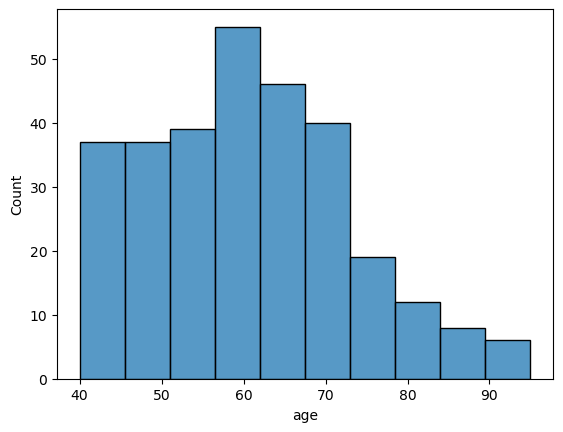

In [14]:
sns.histplot(df.age)

The correlation gives you an idea about if certain values might be connected in some way.

<Axes: >

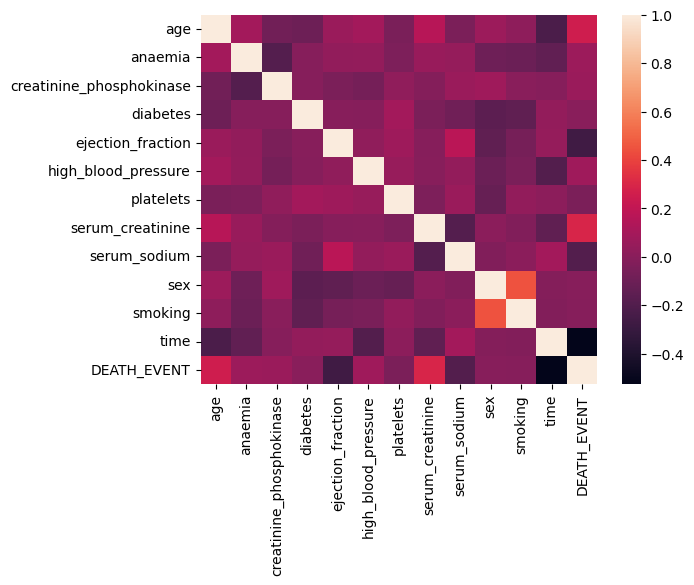

In [15]:
sns.heatmap(df.corr())

Between most variables, there is no noteworthy correlation.

'time' is additional time spent by the patient in the hospital for monitoring. It is negatively correlated with a death event for obvious reasons.

'sex' and 'smoking' are positively correlated. Let's have a look at what's going on.

In [16]:
df.sex

0      1
1      1
2      1
3      1
4      0
      ..
294    1
295    0
296    0
297    1
298    1
Name: sex, Length: 299, dtype: int64

#### Description of the variables

sex - Gender of patient: male = 1, female = 0 \
smoking - Smoking status of patient: smoker = 1, not a smoker = 0

[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

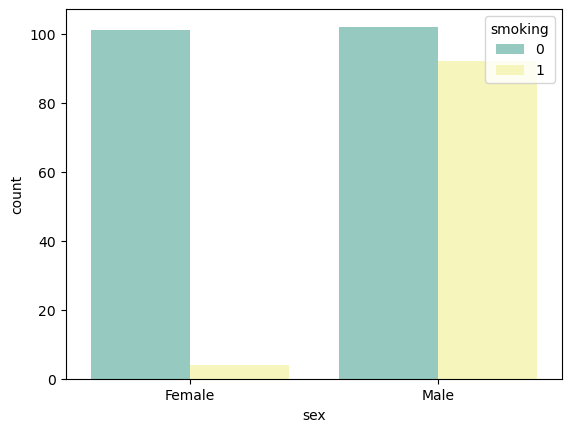

In [30]:
# create a dictionary to map the integer values to their corresponding labels
labels_dict = {0: 'Female', 1: 'Male'}
# transform the categorical value for smoking from integer to string, so it can fit in a label
df['smoking'] = df['smoking'].astype(str)

# plot the data using the dictionary to label the axes
ax = sns.countplot(data=df, x='sex', hue='smoking', palette='Set3')
ax.set_xticklabels([labels_dict[i] for i in ax.get_xticks()])

Among the individuals surveyed in this study, males are more likely to be smokers. This explains the positive correlation.

## Want some extra challenge?
In the plot above, absolute numbers are shown. If you feel motivated, try to display the ratio of smokers and non-smokers among females and males in this study to make the values more comparable. In case you have a cool solution, feel free to share it in the DS channel 🙌